In [ ]:
# Commentaire inutile numéro 2 pour commit / push de test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
pd.options.mode.chained_assignment = None  # default='warn'


## Importation des csv

In [2]:
df_olist_customers_dataset = pd.read_csv("data/olist_customers_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("data/olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("data/olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("data/olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("data/olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("data/olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")

df_olist_geolocation_dataset = pd.read_csv("data/olist_geolocation_dataset.csv")

In [13]:
df_olist_geolocation_dataset["geolocation_zip_code_prefix"].nunique()

0           1037
1           1046
2           1046
3           1041
4           1035
           ...  
1000158    99950
1000159    99900
1000160    99950
1000161    99980
1000162    99950
Name: geolocation_zip_code_prefix, Length: 1000163, dtype: int64

In [10]:
# Group the dataframe by zip code and aggregate by median latitude and median longitude
zip_code_lat_long = df_olist_geolocation_dataset.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat': 'median', 'geolocation_lng': 'median'}).reset_index()

# Print the results
print(zip_code_lat_long)

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                             1001       -23.550381       -46.634027
1                             1002       -23.548551       -46.635072
2                             1003       -23.548977       -46.635313
3                             1004       -23.549535       -46.634771
4                             1005       -23.549612       -46.636532
...                            ...              ...              ...
19010                        99960       -27.953797       -52.029641
19011                        99965       -28.179542       -52.035551
19012                        99970       -28.343273       -51.873734
19013                        99980       -28.388092       -51.846880
19014                        99990       -28.329595       -51.769362

[19015 rows x 3 columns]


In [59]:
df_olist_order_reviews_dataset[df_olist_order_reviews_dataset["order_id"].duplicated(keep=False)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 19:12:30
344,a0a641414ff718ca079b3967ef5c2495,169d7e0fd71d624d306f132acd791cbe,5,NaN,NaN,2018-03-04 00:00:00,2018-03-06 20:12:53
498,505a882ba08a689682a4afc6eb4e5965,1c308eca3f339414a92e518e2a2e5ee9,2,NaN,NaN,2017-12-28 00:00:00,2017-12-31 20:25:02
764,c5976a5a98e854fb23d7e03c6754ae60,2002ea16e75277eaa0b5d78632048540,5,NaN,NaN,2017-08-08 00:00:00,2017-08-10 11:11:29
778,62c7722239b976d943ec0d430cfe890e,1d297b4800ed1a3c5b0944d84c01ee99,3,NaN,NaN,2017-10-22 00:00:00,2017-10-31 15:33:32
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


Dans le dataset des reviews on transforme la colonne review_comment_title et review_comment_message pour obtenir la longueur du message et du titre

In [60]:
from functions import *
df_olist_order_reviews_dataset['length_comment_title'] = df_olist_order_reviews_dataset["review_comment_title"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset['length_comment_message'] = df_olist_order_reviews_dataset["review_comment_message"].apply(lambda x:length_str(x))
df_olist_order_reviews_dataset.drop(["review_comment_title","review_comment_message"],axis=1,inplace=True)
df_olist_order_reviews_dataset = df_olist_order_reviews_dataset.groupby(["order_id","review_score"]).agg({"length_comment_title":"max","length_comment_message":"max","review_answer_timestamp":"first"})

In [61]:
df_olist_order_reviews_dataset.reset_index(inplace=True)

In [62]:
# Convertir la colonne 'date' en un objet de type datetime
df_olist_order_reviews_dataset['review_answer_timestamp'] = pd.to_datetime(df_olist_order_reviews_dataset['review_answer_timestamp'])

# Groupby order_id et trouver l'index de la date la plus récente pour chaque order_id
latest_dates = df_olist_order_reviews_dataset.groupby('order_id').review_answer_timestamp.idxmax()

# Utilisez l'index trouvé pour sélectionner les lignes avec les dates les plus récentes
df_olist_order_reviews_dataset = df_olist_order_reviews_dataset.loc[latest_dates]


In [63]:
df_olist_order_reviews_dataset[df_olist_order_reviews_dataset["order_id"].duplicated(keep=False)].sort_values(by=["order_id","review_answer_timestamp"],ascending=[True, True])

,order_id,review_score,length_comment_title,length_comment_message,review_answer_timestamp


In [64]:
df_olist_order_reviews_dataset

,order_id,review_score,length_comment_title,length_comment_message,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,5,0,46,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,4,0,0,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,5,0,90,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,4,0,0,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,5,0,39,2017-03-03 10:54:59
...,...,...,...,...,...
98870,fffc94f6ce00a00581880bf54a75a037,5,0,0,2018-05-14 12:53:47
98871,fffcd46ef2263f404302a634eb57f7eb,5,0,0,2018-07-25 09:25:29
98872,fffce4705a9662cd70adb13d4a31832d,5,0,0,2017-10-29 21:33:52
98873,fffe18544ffabc95dfada21779c9644f,5,0,47,2017-08-18 12:24:05


Dans le dataset des produits on remplace les nan de la colonne product_photos_qty par 0.

On remplace les nan de la colonne product_category_name par unknown.

On remplace les nan de la colonne product_description_lenght par 0.

On drop la colonne product_name_lenght.


In [65]:
df_olist_products_dataset["product_photos_qty"].fillna(0,inplace=True)
df_olist_products_dataset["product_photos_qty"] = df_olist_products_dataset["product_photos_qty"].astype('int8')
df_olist_products_dataset["product_category_name"].fillna("unknown",inplace=True)
df_olist_products_dataset["product_description_lenght"].fillna(0,inplace=True)
df_olist_products_dataset.drop("product_name_lenght",axis=1,inplace=True)

In [66]:
df_product = df_olist_products_dataset.merge(df_product_category_name_translation,how="outer",on="product_category_name")
df_product["product_category_name_english"].fillna("unknown",inplace=True)
df_product.drop("product_category_name",axis=1,inplace=True)

Dans le dataset des items on groupe par les colonnes order_id ,product_id et seller_id . Pour obtenir le nombre de ce produit achete dans cet commande pour ce vendeur

In [67]:
def get_mode(x):
    return x.mode().iloc[0]
    
df_olist_order_items_dataset = df_olist_order_items_dataset.groupby(["order_id"]).agg({"product_id":get_mode,"order_item_id":"count","price":"sum","freight_value":"sum"})
df_olist_order_items_dataset.columns=["product_most_frequent",'nb_items', 'sum_price', 'sum_freight_value']
df_olist_order_items_dataset.reset_index(inplace=True)

Regroupement par order_id dans le dataset payments pour que les order_id soit unique

In [68]:
df_olist_order_payments_dataset = df_olist_order_payments_dataset.groupby(["order_id"]).agg({"payment_type":lambda x:",".join(set(x)),"payment_sequential":"count","payment_installments":"max","payment_value":"sum"})
df_olist_order_payments_dataset.reset_index(inplace=True)

In [69]:
df_olist_order_payments_dataset["payment_type"]= df_olist_order_payments_dataset["payment_type"].apply(lambda x:'credit_card,voucher' if x == "voucher,credit_card" else x)

## Merge des datasets

In [70]:
df_merge = df_olist_orders_dataset.merge(df_olist_order_reviews_dataset,how="outer",on="order_id")

In [71]:
df_merge = df_merge.merge(df_olist_order_payments_dataset,how="outer",on="order_id")

In [72]:
df_merge = df_merge.merge(df_olist_order_items_dataset,how="outer",on="order_id")

In [73]:
df_merge = df_merge.merge(df_olist_customers_dataset,how="outer",on="customer_id")

In [74]:
df_merge = df_merge.merge(df_product,how="left",right_on='product_id',left_on="product_most_frequent")

In [75]:
# df_merge = df_merge.merge(df_olist_sellers_dataset,how="outer",on="seller_id")

## Visualisation des valeurs manquantes

<AxesSubplot: >

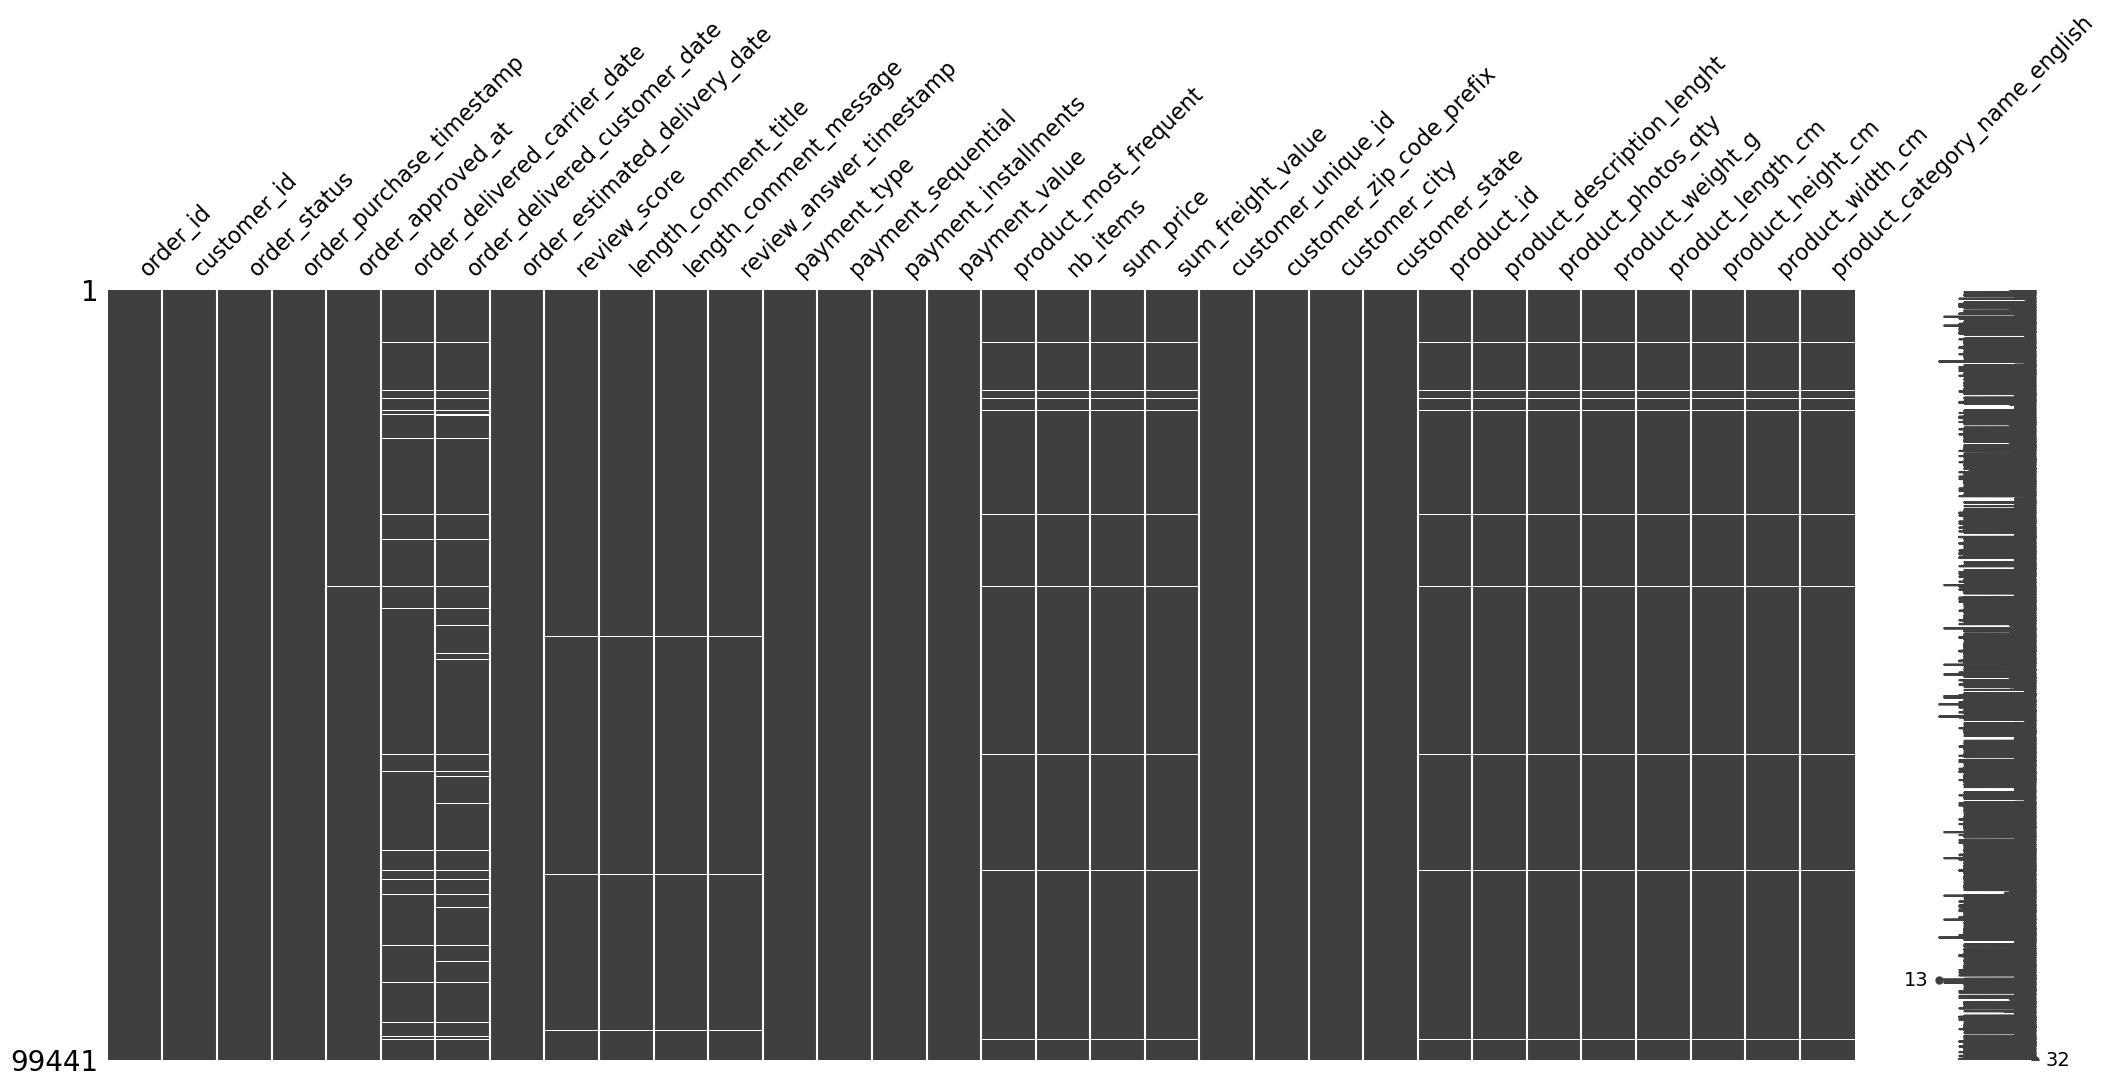

In [76]:
import missingno as msno

msno.matrix(df_merge)

realisation d'un rapport avec pandas profilling

In [77]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_merge, title="Pandas Profiling Report")
# profile.to_file(output_file='rapport_avant.html')

Nous ne conserverons que les order_statuts qui sont "delivered" car les autres categorie sont trop peu representer

In [78]:
df_merge = df_merge.loc[df_merge['order_status'] == "delivered"]

In [79]:
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])
df_merge = df_merge.loc[df_merge['order_purchase_timestamp'].dt.year !=2016]


In [80]:
df_merge['order_purchase_time']=df_merge['order_purchase_timestamp'].dt.strftime('%m/%d/%Y')

In [81]:
df_temp = df_merge.groupby("customer_unique_id").agg({"order_purchase_time":"max"})
df_temp.reset_index(inplace=True)

In [82]:
df_temp["order_purchase_time"] =pd.to_datetime(df_temp["order_purchase_time"])

In [83]:
def nombre_de_jour(date):
    delta = pd.to_datetime('22/10/2018',dayfirst=True) - date
    return delta

df_temp["recence"] = df_temp["order_purchase_time"].apply(lambda x: nombre_de_jour(x)) 
df_temp["recence"] = df_temp["recence"].astype('timedelta64[D]')

In [84]:
df_temp.drop("order_purchase_time",axis=1,inplace=True)

In [85]:
df_merge = df_merge.merge(df_temp,on="customer_unique_id",how="outer")

In [93]:
df_merge_stv = df_merge.copy()

maison=dict.fromkeys(['housewares','home_appliances', 'la_cuisine', 'home_confort','home_comfort_2','home_appliances_2', 'office_furniture','home_construction', 'air_conditioning'],"maison")
outil = dict.fromkeys(['construction_tools_construction','construction_tools_lights','costruction_tools_tools','construction_tools_safety'],"outil")
jardinnage=dict.fromkeys(['flowers','costruction_tools_garden', 'garden_tools'],"jardinnage")
mobilier_electromenager=dict.fromkeys(['furniture_living_room','small_appliances_home_oven_and_coffee', 'small_appliances','furniture_mattress_and_upholstery', 'kitchen_dining_laundry_garden_furniture','furniture_bedroom','bed_bath_table','furniture_decor'],"mobilier_electromenager")
enfant=dict.fromkeys(['diapers_and_hygiene','baby','toys'],"enfant")
fashion=dict.fromkeys(['fashion_sport', 'fashion_childrens_clothes','fashion_underwear_beach','fashion_shoes','fashion_male_clothing', 'fashio_female_clothing','fashion_bags_accessories'],"fashion")
sport=dict.fromkeys(['sports_leisure'],"sport")
auto=dict.fromkeys(['auto','signaling_and_security'],"auto")
service=dict.fromkeys(['industry_commerce_and_business','agro_industry_and_commerce','security_and_services','market_place'],"service")
fete = dict.fromkeys(['party_supplies','christmas_supplies'],"fete")
papeterie=dict.fromkeys(["stationery"],"papeterie")
beaute=dict.fromkeys(['perfumery','health_beauty'],"beaute")
music=dict.fromkeys(['music','musical_instruments','cds_dvds_musicals'],"music")
animaux=dict.fromkeys(['pet_shop'],"animaux")
voyage=dict.fromkeys(['luggage_accessories'],"voyage")
informatique=dict.fromkeys([ 'computers','watches_gifts','audio','fixed_telephony','tablets_printing_image','electronics', 'computers_accessories', 'telephony'],"informatique")
loisir=dict.fromkeys(['consoles_games','dvds_blu_ray'],"loisir")
alimentation=dict.fromkeys(['food', 'drinks', 'food_drink'],"alimentation")
livre=dict.fromkeys(['books_technical','books_general_interest','books_imported'],"livre")
inconue=dict.fromkeys(["unknown"],"inconue")
autre=dict.fromkeys(['cool_stuff'],"autre")
art=dict.fromkeys(['art','arts_and_craftmanship','cine_photo'],"art")

dict_map={**maison,**outil,**jardinnage,**mobilier_electromenager,
        **enfant,**fashion,**sport,**auto,**service,**fete,
        **papeterie,**beaute,**music,**animaux,**voyage,**informatique,
        **loisir,**alimentation,**livre,**inconue,**autre,**art
}
df_merge_stv["product_category_name_english"] = df_merge_stv["product_category_name_english"].map(dict_map)


In [102]:
category_mapping = {"Agro_Industry_and_Commerce": ["agro_industry_and_commerce", "industry_commerce_and_business"],
"Home_and_Comfort": ["air_conditioning", "home_appliances", "home_appliances_2", "home_comfort_2", "home_confort", "housewares", "la_cuisine", "small_appliances", "small_appliances_home_oven_and_coffee","security_and_services", "signaling_and_security"],
"Audio_and_Visual": ["audio", "cds_dvds_musicals", "cine_photo", "dvds_blu_ray", "music", "musical_instruments", "tablets_printing_image"],
"Automotive": ["auto"],
"Baby": ["baby", "diapers_and_hygiene"],
"Food_and_drinks": ["drinks", "food", "food_drink"],
"Computers_and_Electonics": ["computers", "computers_accessories", "electronics"],
"Construction": ["construction_tools_construction", "construction_tools_lights", "construction_tools_safety", "costruction_tools_garden", "costruction_tools_tools", "home_construction"],
"Well-being": ["art", "arts_and_craftmanship","flowers", "party_supplies", "toys", "cool_stuff", "christmas_supplies", "pet_shop", "consoles_games", "luggage_accessories", "watches_gifts", "garden_tools", "books_general_interest", "books_imported", "books_technical"],
"Health_and_Beauty": ["health_beauty","perfumery"],
"Fashion": ["fashio_female_clothing", "fashion_bags_accessories", "fashion_childrens_clothes", "fashion_male_clothing", "fashion_shoes", "fashion_underwear_beach"],
"Sport": ["sports_leisure", "fashion_sport"],
"Miscellaneous": ["market_place", "stationery", "unknown"],
"Communication": ["telephony", "fixed_telephony"],
"Furniture": ["bed_bath_table","furniture_decor", "office_furniture","furniture_bedroom", "furniture_living_room", "furniture_mattress_and_upholstery","kitchen_dining_laundry_garden_furniture"]}

def reverse_dict(d):
    rev_dict = {}
    for key, value in d.items():
        for val in value:
            rev_dict[val] = key
    return rev_dict

reversed_mapping = reverse_dict(category_mapping)

category_list = []

for x in category_mapping:
    for y in category_mapping[x]:
        category_list.append(y)

print(len(category_list))

print(len(df_merge["product_category_name_english"].unique()))

print(list(item for item in list(df_merge["product_category_name_english"].unique()) if item not in category_list))



72
72
[]


In [104]:
df_merge_zol = df_merge.copy()
df_merge["product_category_name_english"] = df_merge_zol["product_category_name_english"].map(reversed_mapping)
print(df_merge["product_category_name_english"].value_counts())
print(df_merge_stv["product_category_name_english"].value_counts())

Well-being                    21046
Furniture                     17329
Health_and_Beauty             11624
Computers_and_Electonics       9167
Home_and_Comfort               8118
Sport                          7498
Communication                  4281
Miscellaneous                  3881
Automotive                     3783
Baby                           2788
Fashion                        2295
Construction                   1867
Audio_and_Visual               1196
Food_and_drinks                 935
Agro_Industry_and_Commerce      403
Name: product_category_name_english, dtype: int64
informatique               19343
mobilier_electromenager    16766
beaute                     11624
maison                      9004
sport                       7474
enfant                      6535
auto                        3921
jardinnage                  3638
autre                       3508
fashion                     2319
papeterie                   2241
animaux                     1674
inconue       

In [107]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96211 entries, 0 to 96210
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96211 non-null  object        
 1   order_status                   96211 non-null  object        
 2   order_purchase_timestamp       96211 non-null  datetime64[ns]
 3   review_score                   95568 non-null  float64       
 4   length_comment_title           95568 non-null  float64       
 5   length_comment_message         95568 non-null  float64       
 6   payment_type                   96211 non-null  object        
 7   payment_installments           96211 non-null  float64       
 8   payment_value                  96211 non-null  float64       
 9   nb_items                       96211 non-null  float64       
 10  sum_price                      96211 non-null  float64       
 11  sum_freight_val

In [106]:
df_merge.drop(['order_id',"order_approved_at","order_delivered_carrier_date","order_delivered_customer_date", 'payment_sequential',"order_estimated_delivery_date", "product_most_frequent",'product_id',"review_answer_timestamp", 'customer_zip_code_prefix']
      ,axis=1,inplace=True
      )

In [ ]:
df_merge["length_comment_title"].fillna(0,inplace=True)
df_merge["length_comment_message"].fillna(0,inplace=True)
df_merge["review_score"].fillna(-1,inplace=True)

In [ ]:
df_merge["product_category_name_english"].fillna("indisponible",inplace=True)
df_merge.fillna(-1,inplace=True)

<AxesSubplot: >

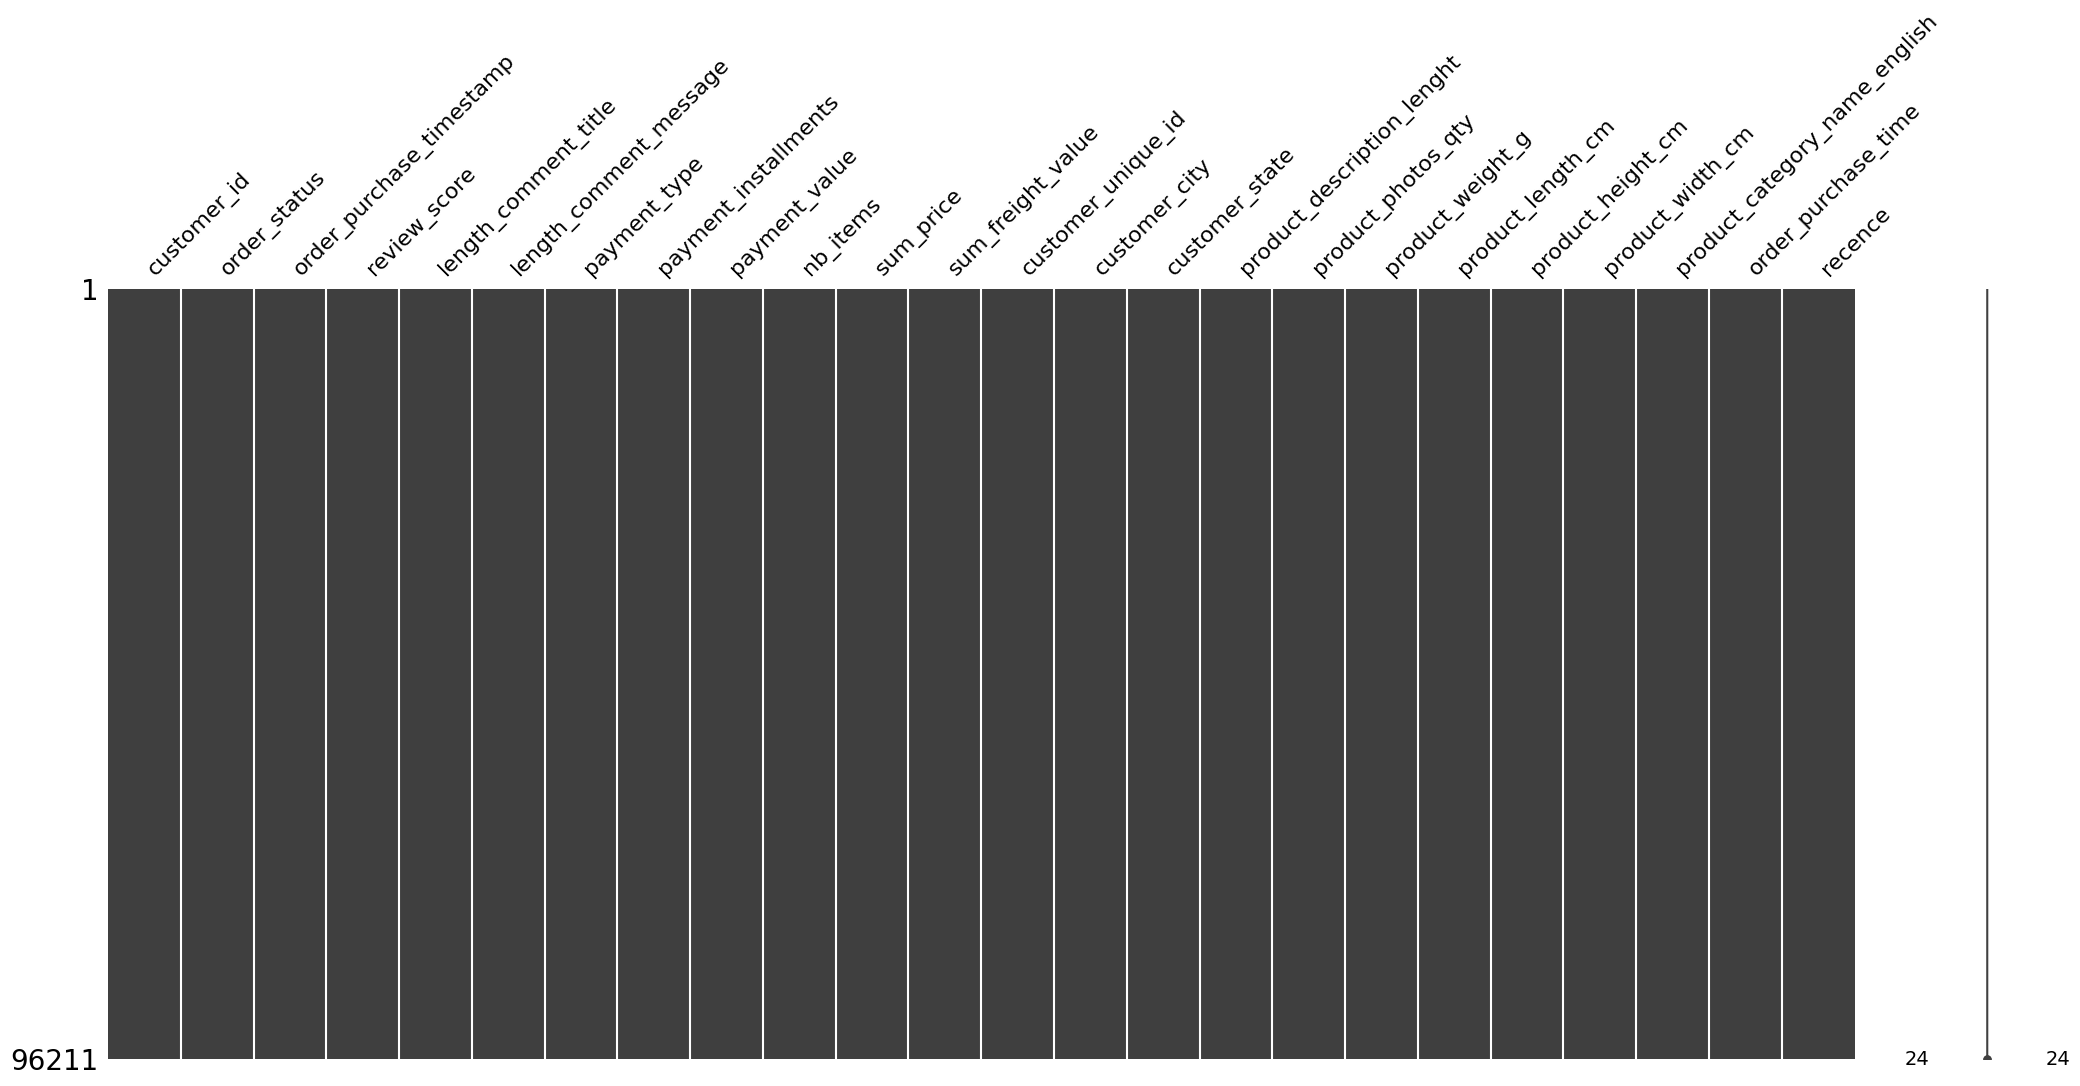

In [ ]:
msno.matrix(df_merge)

In [ ]:
df_merge['recence_score'] = pd.qcut(df_merge['recence'], 5, labels=[5, 4, 3, 2, 1])

In [ ]:
df_merge.columns

Index(['customer_id', 'order_status', 'order_purchase_timestamp',
       'review_score', 'length_comment_title', 'length_comment_message',
       'payment_type', 'payment_installments', 'payment_value', 'nb_items',
       'sum_price', 'sum_freight_value', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'order_purchase_time', 'recence', 'recence_score'],
      dtype='object')

In [ ]:
list_sum = ["nb_items","payment_value"]
list_count = ["customer_id"]
list_mod = ["payment_type","customer_state","customer_city","product_category_name_english"]
list_mean = ["review_score","length_comment_title","length_comment_message"]
list_first = ["recence","recence_score"]
dict_sum = dict.fromkeys(list_sum,"sum")
dict__count = dict.fromkeys(list_count,"count")
dict_mod = dict.fromkeys(list_mod,get_mode)
dict_mean = dict.fromkeys(list_mean,"mean")
dict_first = dict.fromkeys(list_first,"first")
dict_agg = {**dict_sum ,**dict__count,**dict_mod,**dict_mean,**dict_first }


In [ ]:
df_freq = df_merge.groupby("customer_unique_id").agg(dict_agg)

In [ ]:
df_freq.columns = ["nb_items_total","montant_total","nb_commande","most_frequent_payment_type","customer_state","customer_city","most_frequent_product_category","mean_review_score","mean_length_comment_title","mean_length_comment_message","recence","recence_score"]

In [ ]:
df_freq

,nb_items_total,montant_total,nb_commande,most_frequent_payment_type,customer_state,customer_city,most_frequent_product_category,mean_review_score,mean_length_comment_title,mean_length_comment_message,recence,recence_score
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,1,credit_card,SP,cajamar,mobilier_electromenager,5.0,15.0,111.0,165.0,4
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,1,credit_card,SP,osasco,beaute,4.0,0.0,0.0,168.0,4
0000f46a3911fa3c0805444483337064,1.0,86.22,1,credit_card,SC,sao jose,papeterie,3.0,0.0,0.0,591.0,1
0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,1,credit_card,PA,belem,informatique,4.0,0.0,12.0,375.0,2
0004aac84e0df4da2b147fca70cf8255,1.0,196.89,1,credit_card,SP,sorocaba,informatique,5.0,0.0,0.0,342.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2.0,2067.42,1,credit_card,PE,sanharo,beaute,5.0,0.0,0.0,501.0,1
fffea47cd6d3cc0a88bd621562a9d061,1.0,84.58,1,credit_card,BA,feira de santana,enfant,4.0,0.0,0.0,316.0,3
ffff371b4d645b6ecea244b27531430a,1.0,112.46,1,credit_card,MT,sinop,auto,5.0,0.0,0.0,622.0,1


In [ ]:
df_freq['frequence_score'] = pd.cut(df_freq['nb_commande'], 5, labels=[5, 4, 3, 2, 1])
df_freq['montant_score'] = pd.cut(df_freq['montant_total'], 5, labels=[5, 4, 3, 2, 1])

In [ ]:
df_freq['rfm_score'] = df_freq[['recence_score', 'frequence_score', 'montant_score']].sum(axis=1)

In [ ]:
df_freq.reset_index(inplace=True)

In [ ]:
df_freq.drop(["customer_unique_id","customer_city"],axis=1,inplace=True)

In [ ]:
df_freq.to_csv("data/data_merge.csv",index=False)